In [1]:
import numpy as np
import librosa
import librosa.display
from scipy.io.wavfile import write
import matplotlib.pyplot as plt

In [56]:
def show_spectrograms(S_input, S_target, S_pred):
    
    D1 = librosa.amplitude_to_db(S_input)
    D2 = librosa.amplitude_to_db(S_target)
    D3 = librosa.amplitude_to_db(S_pred)
    
    plt.figure()
    ax1 = plt.subplot(3,1,1)
    librosa.display.specshow(D1)
    plt.title('Input')
    plt.colorbar(format='%+2.0f dB')

    ax2 = plt.subplot(3,1,2)
    librosa.display.specshow(D2)
    plt.title('Target')
    plt.colorbar(format='%+2.0f dB')
    
    ax3 = plt.subplot(3,1,3)
    librosa.display.specshow(D3)
    plt.title('Prediction')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

def show_spectrogram(S):
    
    D1 = librosa.amplitude_to_db(S)
    
    plt.figure()
    ax1 = plt.subplot(1,1,1)
    librosa.display.specshow(D1)
    plt.title('Input')
    plt.colorbar(format='%+2.0f dB')

    plt.tight_layout()
    plt.show()

def spectrogram_to_wavfile(filename, S):
    win_length = 1024
    n_fft = 1024
    hop_length = 768
    target_sr = 8192

    # S = np.vstack((S, np.zeros((1, 128)) ))

    print('Inverting spectrogram...')
    y = librosa.istft(S, hop_length=hop_length, win_length = win_length)
    print('Creating {}...'.format(filename))
    write(filename, target_sr, y)
    print('Done')

In [3]:
X_raw = np.load('data.nosync/raw/unet_inputs_raw.npy')
Y_raw = np.load('data.nosync/raw/unet_targets_raw.npy')

In [4]:
X = np.load('data.nosync/spec/unet_inputs_spec.npy')
Y = np.load('data.nosync/spec/unet_targets_spec.npy')

In [58]:
win_length = 1024
n_fft = 1024
hop_length = 768
target_sr = 8192

ix = 100

x_mag = X[ix]
x_reconstructed = np.abs(librosa.stft(X_raw[ix], win_length=win_length, n_fft=n_fft, hop_length=hop_length))
x_raw = X_raw[ix]

y_mag = Y[ix]


print(x_raw.shape, x_reconstructed.shape)

x_masked = x_mag * (y_mag > 0.1)
x_complex_masked = x_mag * (y_mag > 0.1)


(98303,) (513, 768)


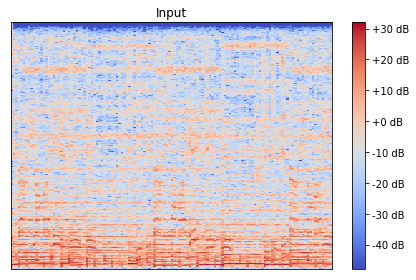

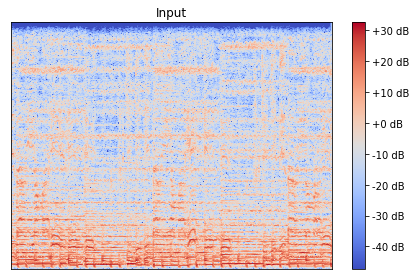

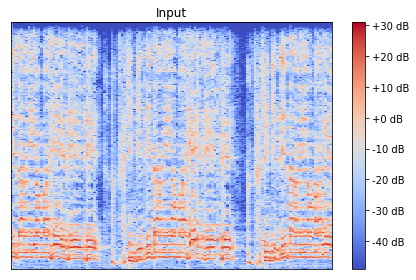

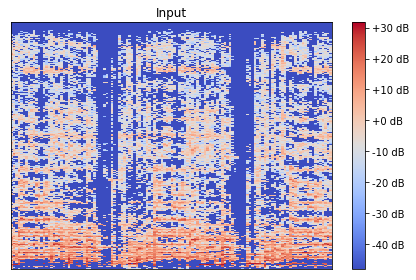

In [59]:
write('x_raw.wav', 8192, x_raw)
spectrogram_to_wavfile('x_recon.wav', x_reconstructed)


Inverting spectrogram...
Creating x_recon.wav...
Done
